## ML Project Steps: 

1. Take big view.
2. Data Cleaning and EDA
3. Feature engineering for ML algorithms
4. Pick ML model and train it

### 1. Take big view

In [1]:
import numpy as np
import pandas as pd
import os
# to make this notebook's output identical at every run
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [2]:
gd1 = pd.read_csv('Goode Health anonymized data set (clean).csv')
gd2 =  pd.read_csv('Goode Health anonymized data set 12.06.21(cleaned).csv')
df = pd.merge_ordered(gd1,gd2,suffixes=('_gd1','_gd2'))
df.head()

,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,...,Phone,MD Approval,NPI Approval,MD Review,NPI Review,Performing Lab,Lab Director,Lab Address,Unnamed: 27,Unnamed: 28
0,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199,135,...,NaN,Jennifer Frangos,1.043417e+09,Jennifer Frangos,1.043417e+09,Ayumetrix,Sonia Kapur,17387 63rd Avenue null Lake Oswego OREGON 97035,NaN,NaN
1,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146,87,...,NaN,Nadia Tereshchenko,1.801082e+09,Nadia Tereshchenko,1.801082e+09,Ayumetrix,Sonia Kapur,17387 63rd Avenue null Lake Oswego OREGON 97035,NaN,NaN
3,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Goode Health Panel,100241122,12/9/2020 0:10,MALE,8/7/1972,TEXAS,77076,MD_RELEASED,172,116,...,NaN,Michael Spagnuolo,1.841258e+09,Michael Spagnuolo,1.841258e+09,Ayumetrix,Sonia Kapur,17387 63rd Avenue null Lake Oswego OREGON 97035,NaN,NaN


After data loading, we need to check columns, data type, state list and descriptive statistic.

In [3]:
df.columns


Index(['Panel', 'Unique ID', 'Created At', 'Gender', 'Date of Birth', 'State',
       'Zip Code', 'Status', 'Cholesterol', 'LDL', 'Triglycerides', 'hs-CRP',
       'HbA1c', 'HDL', 'Panel Code', 'First Name', 'Last Name', 'Address',
       'city', 'Phone', 'MD Approval', 'NPI Approval', 'MD Review',
       'NPI Review', 'Performing Lab', 'Lab Director', 'Lab Address',
       'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [4]:
df.drop(['Panel Code', 'First Name', 'Last Name', 'Address',
       'city', 'Phone', 'MD Approval', 'NPI Approval', 'MD Review',
       'NPI Review', 'Performing Lab', 'Lab Director', 'Lab Address',
       'Unnamed: 27', 'Unnamed: 28'],axis=1, inplace=True)
df.columns

Index(['Panel', 'Unique ID', 'Created At', 'Gender', 'Date of Birth', 'State',
       'Zip Code', 'Status', 'Cholesterol', 'LDL', 'Triglycerides', 'hs-CRP',
       'HbA1c', 'HDL'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154 entries, 0 to 3153
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Panel          3154 non-null   object
 1   Unique ID      3154 non-null   object
 2   Created At     3154 non-null   object
 3   Gender         3154 non-null   object
 4   Date of Birth  3154 non-null   object
 5   State          3151 non-null   object
 6   Zip Code       2981 non-null   object
 7   Status         3154 non-null   object
 8   Cholesterol    3154 non-null   object
 9   LDL            3064 non-null   object
 10  Triglycerides  3154 non-null   object
 11  hs-CRP         3154 non-null   object
 12  HbA1c          3154 non-null   object
 13  HDL            3154 non-null   object
dtypes: object(14)
memory usage: 369.6+ KB


In [6]:
df.drop_duplicates(subset=['Unique ID','Date of Birth'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 3152
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Panel          1789 non-null   object
 1   Unique ID      1789 non-null   object
 2   Created At     1789 non-null   object
 3   Gender         1789 non-null   object
 4   Date of Birth  1789 non-null   object
 5   State          1788 non-null   object
 6   Zip Code       1758 non-null   object
 7   Status         1789 non-null   object
 8   Cholesterol    1789 non-null   object
 9   LDL            1734 non-null   object
 10  Triglycerides  1789 non-null   object
 11  hs-CRP         1789 non-null   object
 12  HbA1c          1789 non-null   object
 13  HDL            1789 non-null   object
dtypes: object(14)
memory usage: 209.6+ KB


In [7]:
df.head()

,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,Triglycerides,hs-CRP,HbA1c,HDL
0,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199,135,137,0.5,5.2,36
2,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146,87,62,0.2,4.9,46
4,Goode Health Panel,100241122,12/9/2020 0:10,MALE,8/7/1972,TEXAS,77076,MD_RELEASED,172,116,92,1,6,38
6,Goode Health Panel,101321357,12/21/2020 10:20,FEMALE,7/27/1985,LOUISIANA,71201,MD_RELEASED,197,147,77,0.4,5.1,34
8,Goode Health Panel,101416413,6/28/2021 8:17,FEMALE,3/5/1999,MINNESOTA,55125,MD_RELEASED,180,110,124,4,5.4,46


We found all chemical substances' data type are object which is can not processed by computing function, so we need to change their datatype as int or float

In [8]:
#df.Cholesterol = df.Cholesterol.astype(float)
#df.LDL = df.LDL.astype(float)
#df.Triglycerides = df.Triglycerides.astype(float)
#df.hs_CRP = df.hs_CRP.astype(float)
#df.HbA1c = df.HbA1c.astype(float)
#df.HDL = df.HDL.astype(float)

In [9]:
df.isna().sum()

Panel             0
Unique ID         0
Created At        0
Gender            0
Date of Birth     0
State             1
Zip Code         31
Status            0
Cholesterol       0
LDL              55
Triglycerides     0
hs-CRP            0
HbA1c             0
HDL               0
dtype: int64

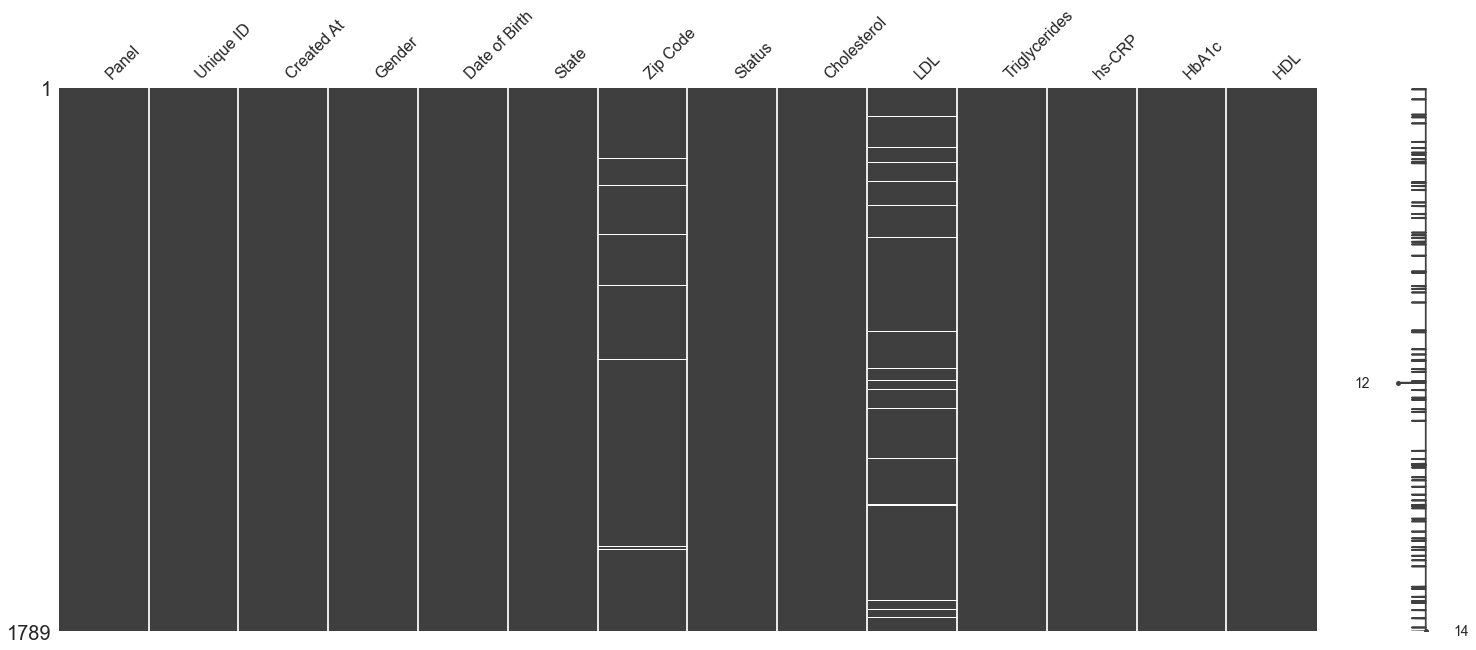

In [10]:
import missingno as msno
msno.matrix(df)
plt.show()

The error shows some strings are existed in dataframe that stop the transforming. So we need check their value.

In [11]:
df['Cholesterol'].unique()

array(['199', '146', '172', '197', '180', '152', '206', '167', '175',
       '191', '161', '187', '176', '173', '139', '150', '127.0', '177',
       '127', '218', '226', '183', '158', '155', '182', '205', '195',
       '201', '188', '165', '99', '178', '269', '103', '169', '122',
       '160', '292', '193', '157', '202.0', '141', '170', '215', '225',
       '250', '153', '198', '251', '186', '166.0', '156', '175.0', '229',
       '216', '112', '121', '124', '168', '148', '199.0', '208', '260',
       '135', '171', '256', '243', '230', '179', '123', '163.0', '261',
       '227', '142', '134', '220', '207', '192', '247', '185', '242.0',
       '203', '189', '173.0', '166', '220.0', '231', '241', '347',
       '208.0', '133', '171.0', '266', '126', '210', '107', '159', '214',
       '273', '151', '184.0', '144', '190', '164', '116', '217', '213',
       '237', '223', '163', '236', '211', '132', '201.0', '219', '174',
       '143', '200', '222', '245.0', '184', '259', '278', '129', '276',


Error contain: QNS

In [12]:
df['LDL'].unique()

array(['135', '87', '116', '147', '110', '57', '132', '40', '104', '138',
       '100', '118', '115', '105', '106', '71.0', '117', '71', '67',
       '162', '157', '126', '134', '94', '91', '123', '97', '141', '149',
       '113', '47', '109', '179', nan, '218', '140', '151', '112',
       '127.0', '82', '90', '66', '124', '153', '95', '192', '76', '77',
       '167', '131', '104.0', '136', '84', '101', '126.0', '62', '58',
       '150', '114', '88', '147.0', '143', '111', '181', '83', '69',
       '176', '169', '86', '119', '137', '165', '72', '177', '193', '98',
       '102', '70', '191', '185', '133', '150.0', '55', '81.0', '51',
       '145.0', '139', '282', '208', '74', '106.0', '182', '80', '50',
       '107', '31', '159', '108', '121', '146', '171', '130', '161', '79',
       '129', '63', '103', '142', '22', '53', '68', '164', '96', '173',
       '163', '93', '145', '85', '163.0', '75', '196', '120', '186',
       '190', '99', '128', 'TNP', '81', '49', '118.0', '121.0', '170',
 

Error contain: TNP

In [13]:
df['HDL'].unique()

array(['36', '46', '38', '34', '81', '53', '90', '58', '43', '51', '40',
       '37', '38.0', '48', '77', '28', '75', '47', '44', '49', '32', '68',
       '57', '41', '30', '45', '62', '60', '39', '67.0', '101', '63',
       '42', '59', '27.0', '33', '55', '35', '56', '23', '37.0', '61',
       '52', '65', '24.0', '99', '85', '54', '50', '55.0', '81.0', '84',
       '42.0', '69', '84.0', '76.0', '67', '98', '31', '82', '66', '72',
       '57.0', '73', '64.0', '87', '132', '79', '27', '52.0', '25',
       '43.0', '76', '45.0', '29', '64', '32.0', '70', '74', '51.0',
       '59.0', '88', '83', '56.0', '71', '54.0', '97', '92', '49.0',
       '36.0', '20', '46.0', '41.0', '26', '22', '39.0', '28.0', '44.0',
       '151', '1.5', '33.0', '68.0', '25.0', '63.0', '78', '48.0', '22.0',
       '34.0', '94', '40.0', '103.0', '70.0', '86', '24', '66.0', '18',
       '47.0', '92.0', '80', '60.0', '91', '58.0', '53.0', '50.0', '16',
       '89', '31.0', '29.0', '108', '< 17.5', '78.0', '74.0', '65.

Error contain: < 17.5

In [14]:
df['Triglycerides'].unique()

array(['137', '62', '92', '77', '124', '73', '102', '184', '68', '50',
       '54', '142', '111', '80', '35', '90.0', '58', '94', '138', '105',
       '84', '87', '112', '79', '135', '131', '60', '71', '91', '53',
       '51', '130', '120', '140', '46', '76', '66', '127', '85', '67',
       '121', '42.0', '69', '89', '81', '61', '90', '259', '64', '225',
       '83', '82', '172.0', '57', '192', '63', '55.0', '162', '59', '98',
       '122', '96', '75', '78', '148', '73.0', '55', '168', '115', '86',
       '464.0', '123', '101', '74', '177', '188', '99', '308', '125',
       '171', '70', '204', '104', '95', '189.0', '100', '56', '108',
       '145', '53.0', '169.0', '116', '113', '203', '91.0', '120.0',
       '109', '175', '52', '106', '205', '183', '115.0', '173', '107',
       '40', '201', '202', '187', '158', '72', '114', '41', '80.0', '117',
       '88', '147', '185', '176', '194', '36', '110', '156', '97', '49',
       '189', '45', '134.0', '245.0', '148.0', '118', '58.0', '128',


Error contain: QNS

In [15]:
df['hs-CRP'].unique()

array(['0.5', '0.2', '1', '0.4', '4', '1.1', '1.4', '0.6', '1.2', '0.8',
       '3', '0.7', '0.9', '2.8', '5.5', '4.8', '1.5', '9.6', '1.6', '5',
       '7.1', '6.9', '0.3', '2.9', '9', '4.3', '2.7', '2.5', '> 10',
       '2.6', '8.3', '8.2', '6.3', '7.8', '4.4', '4.6', '4.9', '3.1',
       '3.7', '11.2', '3.3', '3.9', '5.4', '3.8', '1.3', '10.0', '5.6',
       '1.9', '2.2', '2', '7.4', '9.3', '8.4', '2.4', '7', '6.2', '7.9',
       '3.4', '1.7', '9.9', '1.8', '0', '4.2', '6.1', '11', '5.2', '6',
       '9.4', '6.6', '2.1', '0.1', '3.2', '3.5', '2.3', '9.8', '8', '6.8',
       '4.5', '6.4', '7.5', '7.7', '8.1', '4.7', '< 0.1', '>10', '5.8',
       '0..7', '8.5', '0..9', '4.1', '2.0', '13.6', '10.2', '7.6', '3.6',
       '5.7', '6.5', '5.3', '11.1', '1.0', '5.9', '9.2', '10.5', '9.5',
       '8.9', '7.2', '10.6', '6.7', '12.6', '5.1', '13.8', '7.3', '8.8',
       '8.7', '9.7', '6.0', '9.1', '10.9'], dtype=object)

Error contain: < 0.1, >10, 0..7, > 10, 0..9

In [16]:
df['HbA1c'].unique()

array(['5.2', '4.9', '6', '5.1', '5.4', '5.6', '5.3', '5.9', '6.1', '5.7',
       '6.3', '5.5', '5.8', '7.1', '5', '4.7', '7', '6.8', '6.2', '9.0',
       '14.3', '6.6', '6.0', '11.7', '6.5', '8.4', '14', '9.6', '4.6',
       '10.6', '6.4', '6.9', '12.2', '4.8', '7.5', '6.7', '7.4', '7.3',
       '8.1', '0.5', '5.0', '8', '4.5', '8.8', '7.0', '13.5', '47', '9.9',
       '4.1', '7.2', '9.1', '8.9', '8.5', '12.1', '5..3', '4.4', '10.4',
       '4.2', '8.2', '9.5', '10.8', '11.4', '8.6', '11.6', '9.8', '7.8',
       '11.3', 'QNS', '11.9', '101', '7.6'], dtype=object)

Error contain: QNS, 5..3.

In [17]:
df['Gender'].unique()

array(['MALE', 'FEMALE', 'ANY'], dtype=object)

Error contain: ANY

In [18]:
df['State'].unique()

array(['CONNECTICUT', 'CALIFORNIA', 'TEXAS', 'LOUISIANA', 'MINNESOTA',
       'TENNESSEE', 'NORTH_DAKOTA', 'ARIZONA', 'KANSAS', 'OREGON',
       'WISCONSIN', 'ILLINOIS', 'OHIO', 'NORTH_CAROLINA', 'WASHINGTON',
       'UTAH', 'KENTUCKY', 'COLORADO', 'FLORIDA', 'MASSACHUSETTS',
       'PENNSYLVANIA', 'DISTRICT_OF_COLUMBIA', 'VIRGINIA', ' OHIO',
       'MONTANA', 'MISSOURI', 'GEORGIA', 'NEW_MEXICO', 'SOUTH_CAROLINA',
       'OKLAHOMA', 'NEVADA', 'INDIANA', 'ALASKA', 'MICHIGAN', 'NEBRASKA',
       'WYOMING', 'IDAHO', 'ARKANSAS', 'NEW_HAMPSHIRE', 'IOWA',
       'MARYLAND', 'ALABAMA', 'SOUTH_DAKOTA', 'MISSISSIPPI', 'HAWAII',
       'Leesburg', 'Windsor', 'MAINE', 'Collinsville', 'VERMONT',
       'Parker', 'Pinckney', nan, 'DELAWARE', 'WEST_VIRGINIA', 'Longmont'],
      dtype=object)

Error contain: Leesburg, Collinsville, Parker, Pinckney, Windsor, Longmont.

In [19]:
df.describe()

,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,Triglycerides,hs-CRP,HbA1c,HDL
count,1789,1789,1789,1789,1789,1788,1758,1789,1789,1734,1789,1789,1789,1789
unique,1,1789,1781,3,1663,55,1474,2,282,276,340,118,71,137
top,Goode Health Panel,225810798,9/16/2021 9:30,FEMALE,8/15/1982,CALIFORNIA,97225,MD_RELEASED,171,113,70,0.3,5.6,46
freq,1789,1,2,1495,4,333,5,1644,27,26,28,212,185,63


All in all, we point out these errors in each columns. Apart from that, we also find Feamale has 1119 artibutes which means the raw data is imbalanced, we will fix those issues in next step. 

### 2. Data cleaning & EDA
In this part, we will fix the issues which founded in previous section and generate some plots to explore insights. At first, we fix the data type transforming issue.

In [20]:
df.rename(columns={'hs-CRP': 'hs_CRP', }, inplace=True)


We rename column ‘hs-CRP’as 'hs_CRP', becasue '-' is a function mark in Python that may cause misunderstanding in programming.

In [21]:
df['LDL'] = np.where((df.LDL == 'TNP'), np.nan, df.LDL)
df['Cholesterol'] = np.where((df.Cholesterol == 'QNS'), np.nan, df.Cholesterol)
df['hs_CRP'] = np.where((df.hs_CRP == '< 0.1'),'0.1',df.hs_CRP)
df['hs_CRP'] = np.where((df.hs_CRP == '> 10'),'10',df.hs_CRP)
df['hs_CRP'] = np.where((df.hs_CRP == '>10'),'11.37',df.hs_CRP)
df['hs_CRP'] = np.where((df.hs_CRP == '0..7'),'0.7',df.hs_CRP)
df['hs_CRP'] = np.where((df.hs_CRP == '0..9'),'0.9',df.hs_CRP)
df['Triglycerides'] = np.where((df.Triglycerides == 'QNS'), np.nan, df.Triglycerides)
df['HbA1c'] = np.where((df.HbA1c == 'QNS'),np.nan,df.HbA1c)
df['HbA1c'] = np.where((df.HbA1c == '5..3'),'5.3',df.HbA1c)
df.drop(df.index[df['HbA1c'].isnull()], inplace = True)
df['HDL'] = np.where((df.HDL == '< 17.5'),'17.5',df.HDL)

df.isna().sum()

Panel             0
Unique ID         0
Created At        0
Gender            0
Date of Birth     0
State             1
Zip Code         31
Status            0
Cholesterol       2
LDL              61
Triglycerides     1
hs_CRP            0
HbA1c             0
HDL               0
dtype: int64

So we replace the QNS, TNP as null and fix the rest of error value as max or min. Then we fix the missing value as median in each column.

In [22]:
LDL_median = df["LDL"].median()
Triglycerides_median = df["Triglycerides"].median()
Cholesterol_median = df["Cholesterol"].median()

df = df.fillna({'LDL':LDL_median, 'Cholesterol':Cholesterol_median, 'Triglycerides':Triglycerides_median})


df.isna().sum()

Panel             0
Unique ID         0
Created At        0
Gender            0
Date of Birth     0
State             1
Zip Code         31
Status            0
Cholesterol       0
LDL               0
Triglycerides     0
hs_CRP            0
HbA1c             0
HDL               0
dtype: int64

After data cleaning, we chang data type one more time.

In [23]:
df.Cholesterol = df.Cholesterol.astype(float)
df.LDL = df.LDL.astype(float)
df.Triglycerides = df.Triglycerides.astype(float)
df.hs_CRP = df.hs_CRP.astype(float)
df.HbA1c = df.HbA1c.astype(float)
df.HDL = df.HDL.astype(float)
print(df.dtypes)

Panel             object
Unique ID         object
Created At        object
Gender            object
Date of Birth     object
State             object
Zip Code          object
Status            object
Cholesterol      float64
LDL              float64
Triglycerides    float64
hs_CRP           float64
HbA1c            float64
HDL              float64
dtype: object


In [24]:
df.describe()

,Cholesterol,LDL,Triglycerides,hs_CRP,HbA1c,HDL
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,188.973154,118.725615,110.484228,1.860330,5.805089,49.178803
std,39.226593,36.532224,63.306170,2.316461,2.587757,14.464847
min,9.000000,15.000000,0.800000,0.000000,0.500000,0.700000
25%,163.000000,95.000000,72.000000,0.400000,5.400000,40.000000
50%,187.000000,117.000000,95.000000,0.800000,5.600000,47.000000
75%,213.000000,141.000000,129.000000,2.200000,5.900000,56.000000
max,368.000000,282.000000,859.000000,13.800000,101.000000,151.000000


After data cleaning, we generate histgram and boxplots to check and fix anomaly value.

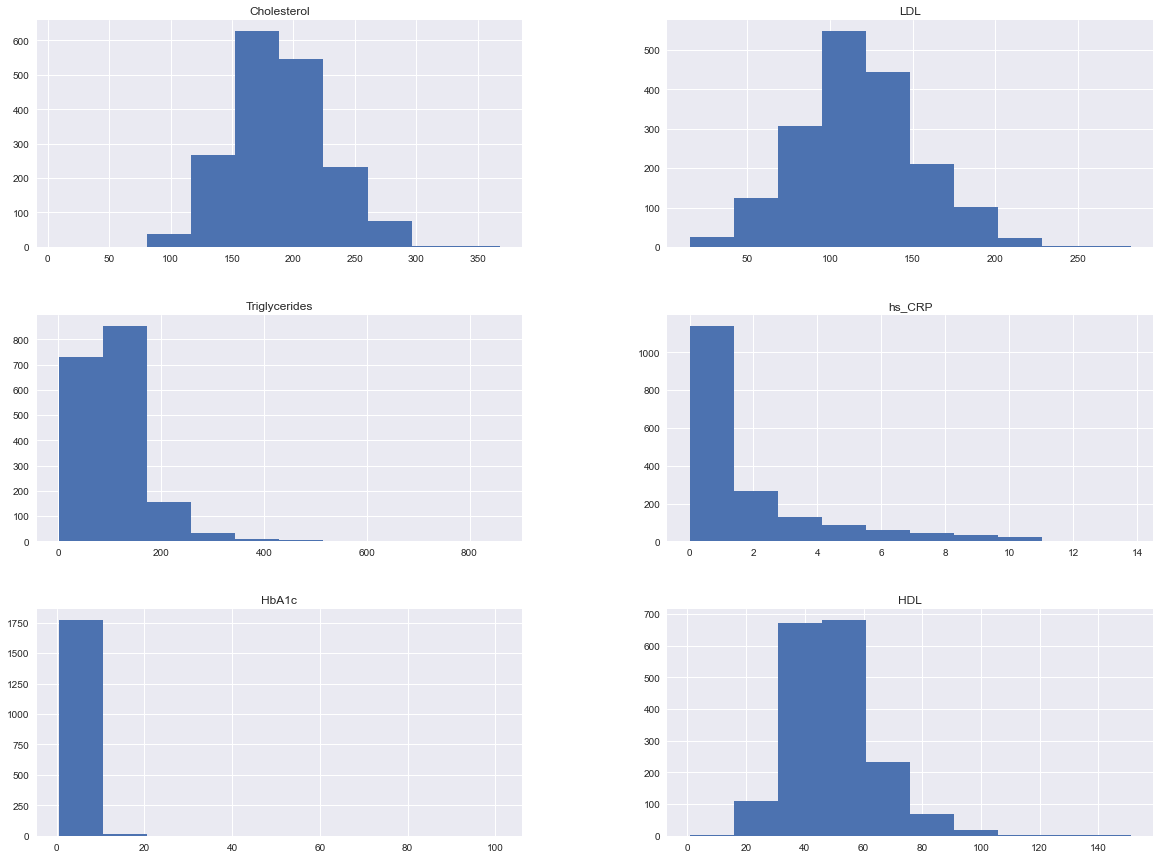

In [25]:
df.hist(figsize=(20,15))
plt.show()

<AxesSubplot:>

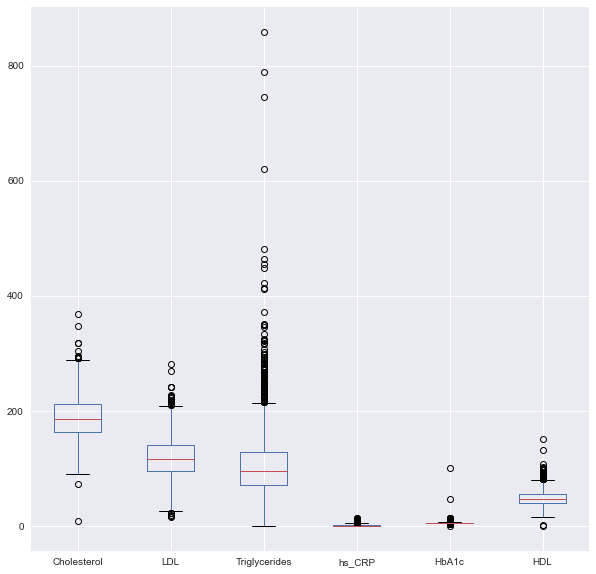

In [26]:
df.boxplot(figsize=(10,10))

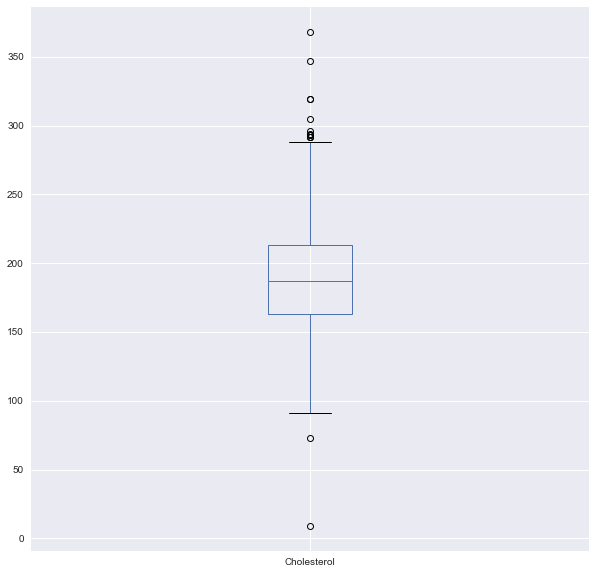

count    1788.000000
mean      188.973154
std        39.226593
min         9.000000
25%       163.000000
50%       187.000000
75%       213.000000
max       368.000000
Name: Cholesterol, dtype: float64

In [27]:
df.boxplot(['Cholesterol'],figsize=(10,10))

plt.show(block=True)
df['Cholesterol'].describe()

According to outcome, the values which >260 or <100 are outlier in Cholrdterol

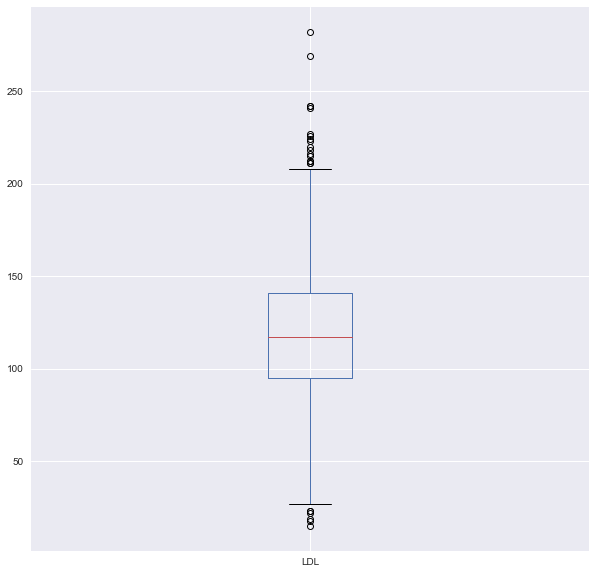

count    1788.000000
mean      118.725615
std        36.532224
min        15.000000
25%        95.000000
50%       117.000000
75%       141.000000
max       282.000000
Name: LDL, dtype: float64

In [28]:
df.boxplot(['LDL'],figsize=(10,10))

plt.show(block=True)
df['LDL'].describe()

According to outcome, the values which >165 or <45 are outlier in LDL

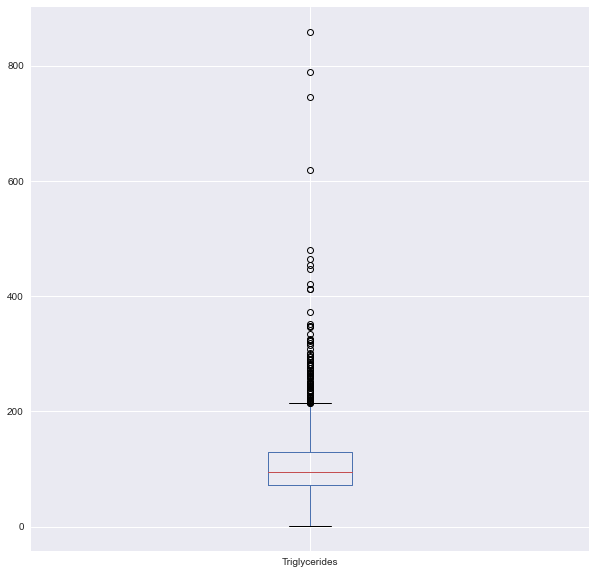

count    1788.000000
mean      110.484228
std        63.306170
min         0.800000
25%        72.000000
50%        95.000000
75%       129.000000
max       859.000000
Name: Triglycerides, dtype: float64

In [29]:
df.boxplot(['Triglycerides'],figsize=(10,10))

plt.show(block=True)
df['Triglycerides'].describe()

According to outcome, the values which >280, <30 are outlier in Triglycerides

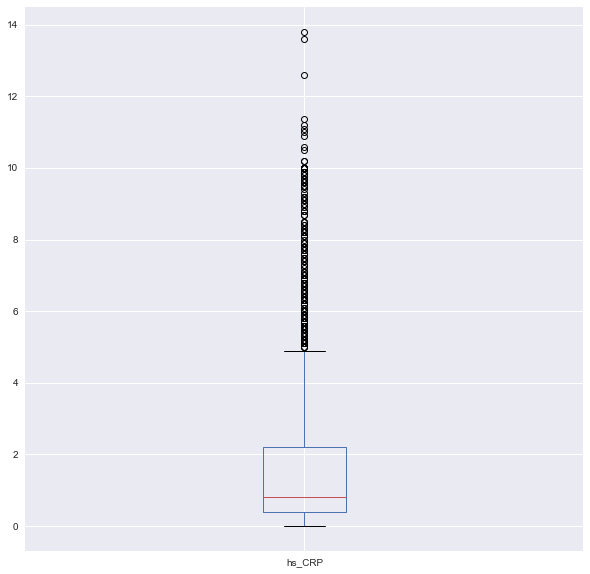

count    1788.000000
mean        1.860330
std         2.316461
min         0.000000
25%         0.400000
50%         0.800000
75%         2.200000
max        13.800000
Name: hs_CRP, dtype: float64

In [30]:
df.boxplot(['hs_CRP'],figsize=(10,10))

plt.show(block=True)
df['hs_CRP'].describe()

According to outcome, the values which > 20 are outlier in hs_CRP

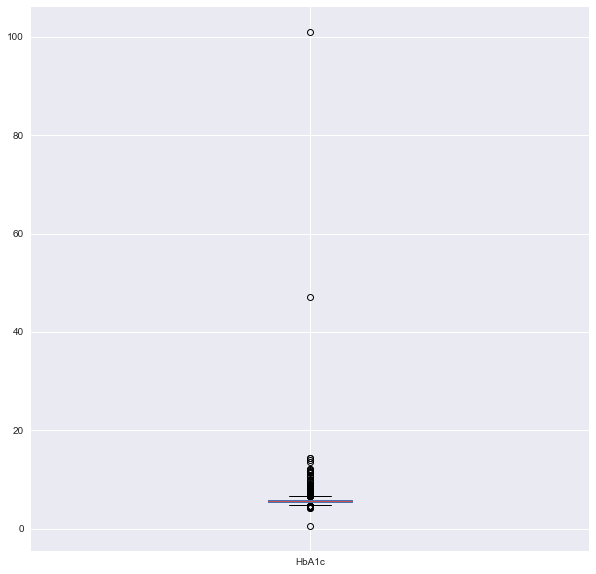

count    1788.000000
mean        5.805089
std         2.587757
min         0.500000
25%         5.400000
50%         5.600000
75%         5.900000
max       101.000000
Name: HbA1c, dtype: float64

In [31]:
df.boxplot(['HbA1c'],figsize=(10,10))

plt.show(block=True)
df['HbA1c'].describe()

According to outcome, the values which > 20 are outlier in HbA1c

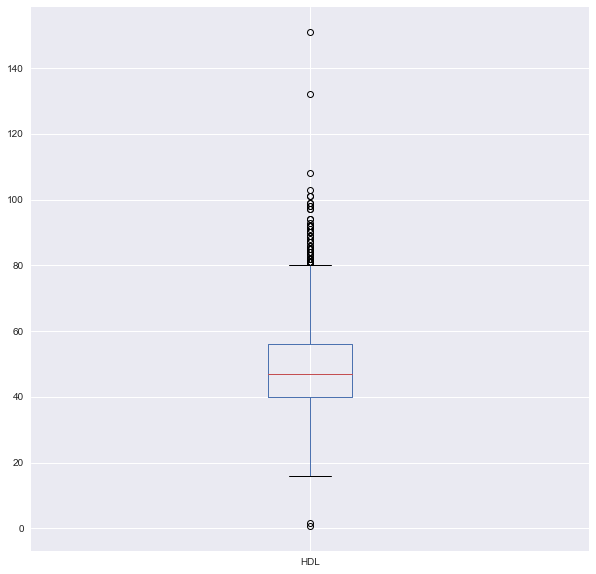

count    1788.000000
mean       49.178803
std        14.464847
min         0.700000
25%        40.000000
50%        47.000000
75%        56.000000
max       151.000000
Name: HDL, dtype: float64

In [32]:
df.boxplot(['HDL'],figsize=(10,10))

plt.show(block=True)
df['HDL'].describe()

According to outcome, the values which >80 or <20 are outlier in HDL

After distinguilsh outliers in each column, we will fix these value as reference range which base on Max (Q3 + 1.5* IQR) or Min (Q1 - 1.5 * IQR)

In [33]:
df.loc[(df['Cholesterol']>260),'Cholesterol' ] = 260
df.loc[(df['Cholesterol']<100),'Cholesterol' ] = 100

In [34]:
df.loc[(df['LDL']>165),'LDL' ] = 165
df.loc[(df['LDL']<45),'LDL' ] = 45

In [35]:
df.loc[(df['Triglycerides']>280),'Triglycerides'] = 280
df.loc[(df['Triglycerides']<30),'Triglycerides'] = 30

In [36]:
df.loc[(df['hs_CRP']>20),'hs_CRP'] = 20

In [37]:
df.loc[(df['HbA1c']>20),'HbA1c'] = 20


In [38]:
df.loc[(df['HDL']>80),'HDL' ] = 80
df.loc[(df['HDL']<20),'HDL' ] = 20

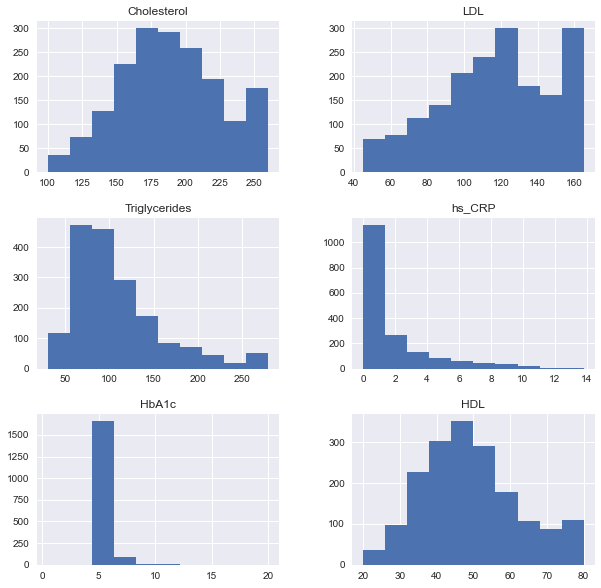

In [39]:
df.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

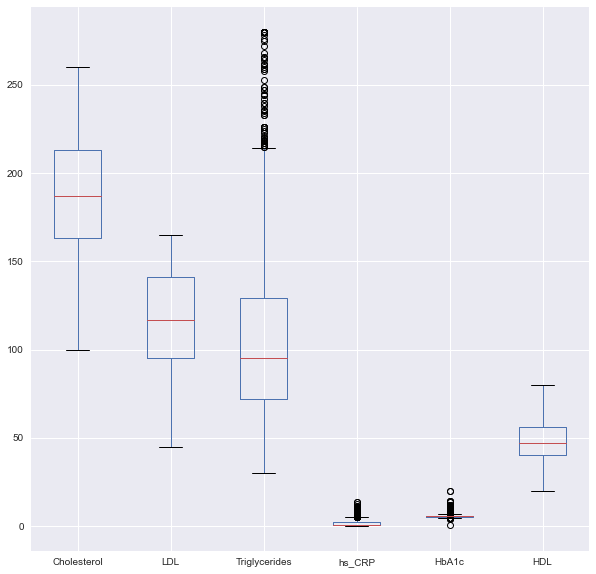

In [40]:
df.boxplot(figsize=(10,10))

After outlier fixing, we also need to fix state and gender issue.

In [41]:
df.drop(df.index[df['State'] == 'Leesburg'], inplace = True)
df.drop(df.index[df['State'] == 'Collinsville'], inplace = True)
df.drop(df.index[df['State'] == 'Parker'], inplace = True)
df.drop(df.index[df['State'] == 'Pinckney'], inplace = True)
df.drop(df.index[df['State'] == 'Longmont'], inplace = True)
df.drop(df.index[df['State'] == 'Windsor'], inplace = True)
df.drop(df.index[df['State'].isnull()], inplace = True)
df['State'].unique()

array(['CONNECTICUT', 'CALIFORNIA', 'TEXAS', 'LOUISIANA', 'MINNESOTA',
       'TENNESSEE', 'NORTH_DAKOTA', 'ARIZONA', 'KANSAS', 'OREGON',
       'WISCONSIN', 'ILLINOIS', 'OHIO', 'NORTH_CAROLINA', 'WASHINGTON',
       'UTAH', 'KENTUCKY', 'COLORADO', 'FLORIDA', 'MASSACHUSETTS',
       'PENNSYLVANIA', 'DISTRICT_OF_COLUMBIA', 'VIRGINIA', ' OHIO',
       'MONTANA', 'MISSOURI', 'GEORGIA', 'NEW_MEXICO', 'SOUTH_CAROLINA',
       'OKLAHOMA', 'NEVADA', 'INDIANA', 'ALASKA', 'MICHIGAN', 'NEBRASKA',
       'WYOMING', 'IDAHO', 'ARKANSAS', 'NEW_HAMPSHIRE', 'IOWA',
       'MARYLAND', 'ALABAMA', 'SOUTH_DAKOTA', 'MISSISSIPPI', 'HAWAII',
       'MAINE', 'VERMONT', 'DELAWARE', 'WEST_VIRGINIA'], dtype=object)

In [42]:
df.drop(df.index[df['Gender'] == 'ANY'], inplace = True)
df['Gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

### 3. Feature Engineering
To be brief, feature engineering is a process which translates some representation that computer or program has difficulty to understand into something easy for them to digest.

In this part, we will label all chemical substance as different level according to the biomarkers which our sponsor provided. Spiltting the time stamp and compute each customer's age, risk index. Encoding state and gender for machine learning part.

In [43]:
# Cholesterol_level Setting
df.loc[(df['Cholesterol']<200), 'Cholesterol_level'] = 1
df.loc[(df['Cholesterol']>=200) & (df['Cholesterol']<=240), 'Cholesterol_level'] = 2
df.loc[(df['Cholesterol']>240), 'Cholesterol_level'] = 3

# LDL_level Setting
df.loc[(df['LDL']<50), 'LDL_level'] = 1
df.loc[(df['LDL']>=50) & (df['LDL']<100), 'LDL_level'] = 2
df.loc[(df['LDL']>=100) & (df['LDL']<160), 'LDL_level'] = 3
df.loc[(df['LDL']>=160), 'LDL_level'] = 4

# Triglycerides_level Setting
df.loc[(df['Triglycerides']<100), 'Triglycerides_level'] = 1
df.loc[(df['Triglycerides']>=100) & (df['Triglycerides']<150), 'Triglycerides_level'] = 2
df.loc[(df['Triglycerides']>=150) & (df['Triglycerides']<200), 'Triglycerides_level'] = 3
df.loc[(df['Triglycerides']>=200), 'Triglycerides_level'] = 4

# hs_CRP_level Setting
df.loc[(df['hs_CRP']<0.5), 'hs_CRP_level'] = 1
df.loc[(df['hs_CRP']>=0.5) & (df['hs_CRP']<1), 'hs_CRP_level'] = 2
df.loc[(df['hs_CRP']>=1) & (df['hs_CRP']<3), 'hs_CRP_level'] = 3
df.loc[(df['hs_CRP']>=3), 'hs_CRP_level'] = 4

# HbA1c_level Setting
df.loc[(df['hs_CRP']<0.5), 'hs_CRP_level'] = 1
df.loc[(df['hs_CRP']>=0.5) & (df['hs_CRP']<1), 'hs_CRP_level'] = 2
df.loc[(df['hs_CRP']>=1) & (df['hs_CRP']<3), 'hs_CRP_level'] = 3
df.loc[(df['hs_CRP']>=3), 'hs_CRP_level'] = 4

# HbA1c_level Setting
df.loc[(df['HbA1c']<4), 'HbA1c_level'] = 1
df.loc[(df['HbA1c']>=4) & (df['HbA1c']<5.7), 'HbA1c_level'] = 2
df.loc[(df['HbA1c']>=5.7) & (df['HbA1c']<6.4), 'HbA1c_level'] = 3
df.loc[(df['HbA1c']>=6.4), 'HbA1c_level'] = 4

# HDL_level Setting
df.loc[(df['HDL']<40), 'HDL_level'] = 4
df.loc[(df['HDL']>=40) & (df['HDL']<60), 'HDL_level'] = 3
df.loc[(df['HDL']>=60) & (df['HDL']<90), 'HDL_level'] = 1
df.loc[(df['HDL']>=90), 'HDL_level'] = 0

# Cholesterol/HDL Ratio
df['Cholesterol_HDL Ratio'] = df['Cholesterol'] / df['HDL']

# Cholesterol/HDL Ratio_level Setting
df.loc[(df['Cholesterol_HDL Ratio']<4.1), 'Cholesterol_HDL Ratio_level'] = 1
df.loc[(df['Cholesterol_HDL Ratio']>=4.1) & (df['Cholesterol_HDL Ratio']<=5), 'Cholesterol_HDL Ratio_level'] = 2
df.loc[(df['Cholesterol_HDL Ratio']>5), 'Cholesterol_HDL Ratio_level'] = 3

# Triglycerides/HDL Ratio
df['Triglycerides_HDL Ratio' ] = df['Triglycerides'] / df['HDL']

# Triglycerides/HDL Ratio_level Setting
df.loc[(df['Triglycerides_HDL Ratio']<2), 'Triglycerides_HDL Ratio_level'] = 1
df.loc[(df['Triglycerides_HDL Ratio']>=2) & (df['Triglycerides_HDL Ratio']<=4.1), 'Triglycerides_HDL Ratio_level'] = 2
df.loc[(df['Triglycerides_HDL Ratio']>4.1), 'Triglycerides_HDL Ratio_level'] = 3

df


,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,...,Cholesterol_level,LDL_level,Triglycerides_level,hs_CRP_level,HbA1c_level,HDL_level,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level
0,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199.0,135.0,...,1.0,3.0,2.0,2.0,2.0,4.0,5.527778,3.0,3.805556,2.0
2,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146.0,87.0,...,1.0,2.0,1.0,1.0,2.0,3.0,3.173913,1.0,1.347826,1.0
4,Goode Health Panel,100241122,12/9/2020 0:10,MALE,8/7/1972,TEXAS,77076,MD_RELEASED,172.0,116.0,...,1.0,3.0,1.0,3.0,3.0,4.0,4.526316,2.0,2.421053,2.0
6,Goode Health Panel,101321357,12/21/2020 10:20,FEMALE,7/27/1985,LOUISIANA,71201,MD_RELEASED,197.0,147.0,...,1.0,3.0,1.0,1.0,2.0,4.0,5.794118,3.0,2.264706,2.0
8,Goode Health Panel,101416413,6/28/2021 8:17,FEMALE,3/5/1999,MINNESOTA,55125,MD_RELEASED,180.0,110.0,...,1.0,3.0,2.0,4.0,2.0,3.0,3.913043,1.0,2.695652,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Goode Health Panel,997868692,10/6/2021 10:16,FEMALE,12/20/1982,OHIO,44102,MD_RELEASED,170.0,82.0,...,1.0,2.0,1.0,2.0,2.0,1.0,2.328767,1.0,1.095890,1.0
3146,Goode Health Panel,MX.01-0001,6/21/2021 13:21,FEMALE,4/15/1983,COLORADO,80206,MD_RELEASED,231.0,165.0,...,2.0,4.0,2.0,1.0,3.0,3.0,5.250000,3.0,2.409091,2.0
3148,Goode Health Panel,MX.01-0002,6/30/2021 11:06,MALE,3/8/1968,COLORADO,80016,MD_RELEASED,188.0,120.0,...,1.0,3.0,1.0,2.0,2.0,3.0,3.686275,1.0,1.686275,1.0
3150,Goode Health Panel,MX.01-0003,7/1/2021 12:51,FEMALE,9/17/1984,MISSOURI,63109,MD_RELEASED,134.0,76.0,...,1.0,2.0,1.0,2.0,3.0,3.0,2.791667,1.0,1.083333,1.0


Spilting time stamp into day, month, year column

In [44]:
df['Birth of day'] = pd.DatetimeIndex(df['Date of Birth']).day
df['Birth of month'] = pd.DatetimeIndex(df['Date of Birth']).month
df['Birth of year'] = pd.DatetimeIndex(df['Date of Birth']).year
df

,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,...,hs_CRP_level,HbA1c_level,HDL_level,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level,Birth of day,Birth of month,Birth of year
0,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199.0,135.0,...,2.0,2.0,4.0,5.527778,3.0,3.805556,2.0,3,12,1962
2,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146.0,87.0,...,1.0,2.0,3.0,3.173913,1.0,1.347826,1.0,8,6,1991
4,Goode Health Panel,100241122,12/9/2020 0:10,MALE,8/7/1972,TEXAS,77076,MD_RELEASED,172.0,116.0,...,3.0,3.0,4.0,4.526316,2.0,2.421053,2.0,7,8,1972
6,Goode Health Panel,101321357,12/21/2020 10:20,FEMALE,7/27/1985,LOUISIANA,71201,MD_RELEASED,197.0,147.0,...,1.0,2.0,4.0,5.794118,3.0,2.264706,2.0,27,7,1985
8,Goode Health Panel,101416413,6/28/2021 8:17,FEMALE,3/5/1999,MINNESOTA,55125,MD_RELEASED,180.0,110.0,...,4.0,2.0,3.0,3.913043,1.0,2.695652,2.0,5,3,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Goode Health Panel,997868692,10/6/2021 10:16,FEMALE,12/20/1982,OHIO,44102,MD_RELEASED,170.0,82.0,...,2.0,2.0,1.0,2.328767,1.0,1.095890,1.0,20,12,1982
3146,Goode Health Panel,MX.01-0001,6/21/2021 13:21,FEMALE,4/15/1983,COLORADO,80206,MD_RELEASED,231.0,165.0,...,1.0,3.0,3.0,5.250000,3.0,2.409091,2.0,15,4,1983
3148,Goode Health Panel,MX.01-0002,6/30/2021 11:06,MALE,3/8/1968,COLORADO,80016,MD_RELEASED,188.0,120.0,...,2.0,2.0,3.0,3.686275,1.0,1.686275,1.0,8,3,1968
3150,Goode Health Panel,MX.01-0003,7/1/2021 12:51,FEMALE,9/17/1984,MISSOURI,63109,MD_RELEASED,134.0,76.0,...,2.0,3.0,3.0,2.791667,1.0,1.083333,1.0,17,9,1984


Compute customers' age and combination score

In [45]:
df['CustomerAge'] = 2021 - df['Birth of year']

After we calculate each customer's age, we will label them in 3 different group: 1(age urder 35), 2 (age 35-60),3 (over 60).

In [46]:
df.loc[(df['CustomerAge']<35), 'Age_level'] = 1
df.loc[(df['CustomerAge']>=35) & (df['CustomerAge']<=60), 'Age_level'] = 2
df.loc[(df['CustomerAge']>60), 'Age_level'] = 3

We sum up all chemical substence level called Risk Index as the object for machine learning part. 

In [47]:
df['Risk_Index'] = df['Cholesterol_level'] + df['LDL_level'] + df['Triglycerides_level'] + df['hs_CRP_level'] + df['HbA1c_level'] + df['HDL_level']
df

,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,...,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level,Birth of day,Birth of month,Birth of year,CustomerAge,Age_level,Risk_Index
0,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199.0,135.0,...,5.527778,3.0,3.805556,2.0,3,12,1962,59,2.0,14.0
2,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146.0,87.0,...,3.173913,1.0,1.347826,1.0,8,6,1991,30,1.0,10.0
4,Goode Health Panel,100241122,12/9/2020 0:10,MALE,8/7/1972,TEXAS,77076,MD_RELEASED,172.0,116.0,...,4.526316,2.0,2.421053,2.0,7,8,1972,49,2.0,15.0
6,Goode Health Panel,101321357,12/21/2020 10:20,FEMALE,7/27/1985,LOUISIANA,71201,MD_RELEASED,197.0,147.0,...,5.794118,3.0,2.264706,2.0,27,7,1985,36,2.0,12.0
8,Goode Health Panel,101416413,6/28/2021 8:17,FEMALE,3/5/1999,MINNESOTA,55125,MD_RELEASED,180.0,110.0,...,3.913043,1.0,2.695652,2.0,5,3,1999,22,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,Goode Health Panel,997868692,10/6/2021 10:16,FEMALE,12/20/1982,OHIO,44102,MD_RELEASED,170.0,82.0,...,2.328767,1.0,1.095890,1.0,20,12,1982,39,2.0,9.0
3146,Goode Health Panel,MX.01-0001,6/21/2021 13:21,FEMALE,4/15/1983,COLORADO,80206,MD_RELEASED,231.0,165.0,...,5.250000,3.0,2.409091,2.0,15,4,1983,38,2.0,15.0
3148,Goode Health Panel,MX.01-0002,6/30/2021 11:06,MALE,3/8/1968,COLORADO,80016,MD_RELEASED,188.0,120.0,...,3.686275,1.0,1.686275,1.0,8,3,1968,53,2.0,12.0
3150,Goode Health Panel,MX.01-0003,7/1/2021 12:51,FEMALE,9/17/1984,MISSOURI,63109,MD_RELEASED,134.0,76.0,...,2.791667,1.0,1.083333,1.0,17,9,1984,37,2.0,12.0


In this step, we will encoding ourstate and gender.

In [48]:
df.State = pd.Categorical(df.State)
df['Region_Label'] = df.State.cat.codes
region_label = df[['Region_Label']]
region_label

,Region_Label
0,7
2,5
4,41
6,19
8,24
...,...
3145,34
3146,6
3148,6
3150,26


In [49]:
df.Gender = pd.Categorical(df.Gender)
df['Gender_Label'] = df.Gender.cat.codes
gender_label = df[['Gender_Label']]
gender_label

,Gender_Label
0,1
2,1
4,1
6,0
8,0
...,...
3145,0
3146,0
3148,1
3150,0


C:\Users\libin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Index', ylabel='count'>

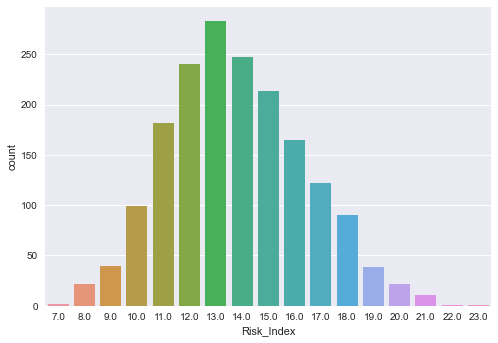

In [50]:
sns.countplot('Risk_Index', data=df)

In [51]:
df.loc[(df['Risk_Index']<12), 'Risk_level'] = 1
df.loc[(df['Risk_Index']>=12) & (df['Risk_Index']<16), 'Risk_level'] = 2
df.loc[(df['Risk_Index']>=16) & (df['Risk_Index']<20), 'Risk_level'] = 3
df.loc[(df['Risk_Index']>=20), 'Risk_level'] = 4

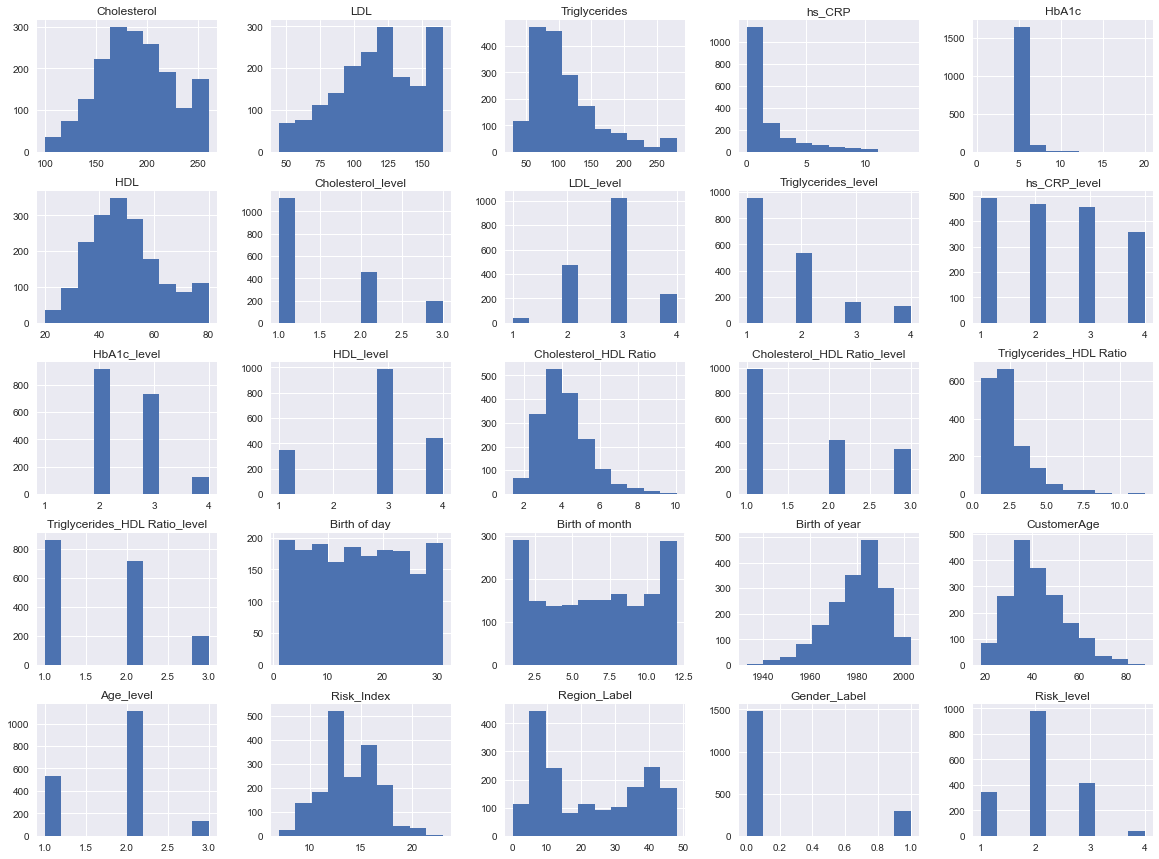

In [52]:
df.hist(figsize=(20,15))
plt.show()

Since all of them are labeled under numbers, we need to use another way of encoding to eliminate the affect of numerical values. This affected numerical values encoding method called OneHotEncoding.

This method will transform the label as an array. 

For example, we have 3 cities: Beijing, Boston, London;

the region label would be: 1,2,3;

the OneHotEncoding would be: [1,0,0], [0,1,0], [0,0,1]

In [53]:
from sklearn.preprocessing import  OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
region_1hot = cat_encoder.fit_transform(region_label)
region_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [54]:
cat_encoder.categories_
df.head()

,Panel,Unique ID,Created At,Gender,Date of Birth,State,Zip Code,Status,Cholesterol,LDL,...,Triglycerides_HDL Ratio_level,Birth of day,Birth of month,Birth of year,CustomerAge,Age_level,Risk_Index,Region_Label,Gender_Label,Risk_level
0,Goode Health Panel,1,6/17/2020 11:40,MALE,12/3/1962,CONNECTICUT,6824,MD_RELEASED,199.0,135.0,...,2.0,3,12,1962,59,2.0,14.0,7,1,2.0
2,Goode Health Panel,10,6/18/2020 2:15,MALE,6/8/1991,CALIFORNIA,94107,MD_RELEASED,146.0,87.0,...,1.0,8,6,1991,30,1.0,10.0,5,1,1.0
4,Goode Health Panel,100241122,12/9/2020 0:10,MALE,8/7/1972,TEXAS,77076,MD_RELEASED,172.0,116.0,...,2.0,7,8,1972,49,2.0,15.0,41,1,2.0
6,Goode Health Panel,101321357,12/21/2020 10:20,FEMALE,7/27/1985,LOUISIANA,71201,MD_RELEASED,197.0,147.0,...,2.0,27,7,1985,36,2.0,12.0,19,0,2.0
8,Goode Health Panel,101416413,6/28/2021 8:17,FEMALE,3/5/1999,MINNESOTA,55125,MD_RELEASED,180.0,110.0,...,2.0,5,3,1999,22,1.0,15.0,24,0,2.0


In [55]:
df.to_excel("Present_GoodeHealth.xlsx") 

Then we drop irrelevant features and reorganize the features order that put the combination to first palce as model objective

In [56]:
df.drop([ 'Panel','Unique ID', 'Created At', 'Date of Birth', 'State', 'Zip Code', 'Status','Birth of day', 'Birth of month', 'Birth of year'], axis=1, inplace=True)
order = ['Risk_Index','Cholesterol', 'LDL', 'Triglycerides', 'hs_CRP', 'HbA1c', 'HDL',
       'Cholesterol_level', 'LDL_level', 'Triglycerides_level', 'hs_CRP_level',
       'HbA1c_level', 'HDL_level', 'Cholesterol_HDL Ratio',
       'Cholesterol_HDL Ratio_level', 'Triglycerides_HDL Ratio',
       'Triglycerides_HDL Ratio_level', 'CustomerAge', 'Age_level', 'Gender_Label','Region_Label','Risk_level'
       ]
df = df[order]
df

,Risk_Index,Cholesterol,LDL,Triglycerides,hs_CRP,HbA1c,HDL,Cholesterol_level,LDL_level,Triglycerides_level,...,HDL_level,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level,CustomerAge,Age_level,Gender_Label,Region_Label,Risk_level
0,14.0,199.0,135.0,137.0,0.5,5.2,36.0,1.0,3.0,2.0,...,4.0,5.527778,3.0,3.805556,2.0,59,2.0,1,7,2.0
2,10.0,146.0,87.0,62.0,0.2,4.9,46.0,1.0,2.0,1.0,...,3.0,3.173913,1.0,1.347826,1.0,30,1.0,1,5,1.0
4,15.0,172.0,116.0,92.0,1.0,6.0,38.0,1.0,3.0,1.0,...,4.0,4.526316,2.0,2.421053,2.0,49,2.0,1,41,2.0
6,12.0,197.0,147.0,77.0,0.4,5.1,34.0,1.0,3.0,1.0,...,4.0,5.794118,3.0,2.264706,2.0,36,2.0,0,19,2.0
8,15.0,180.0,110.0,124.0,4.0,5.4,46.0,1.0,3.0,2.0,...,3.0,3.913043,1.0,2.695652,2.0,22,1.0,0,24,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,9.0,170.0,82.0,80.0,0.6,5.3,73.0,1.0,2.0,1.0,...,1.0,2.328767,1.0,1.095890,1.0,39,2.0,0,34,1.0
3146,15.0,231.0,165.0,106.0,0.3,5.9,44.0,2.0,4.0,2.0,...,3.0,5.250000,3.0,2.409091,2.0,38,2.0,0,6,2.0
3148,12.0,188.0,120.0,86.0,0.8,5.6,51.0,1.0,3.0,1.0,...,3.0,3.686275,1.0,1.686275,1.0,53,2.0,1,6,2.0
3150,12.0,134.0,76.0,52.0,0.5,5.8,48.0,1.0,2.0,1.0,...,3.0,2.791667,1.0,1.083333,1.0,37,2.0,0,26,2.0


In [57]:
df.describe()

,Risk_Index,Cholesterol,LDL,Triglycerides,hs_CRP,HbA1c,HDL,Cholesterol_level,LDL_level,Triglycerides_level,...,HDL_level,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level,CustomerAge,Age_level,Gender_Label,Region_Label,Risk_level
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,...,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,13.797077,188.283305,116.656773,108.420461,1.859567,5.746206,48.867903,1.479483,2.824058,1.695334,...,2.861720,4.110891,1.641934,2.407768,1.625070,41.450815,1.775717,0.164137,21.931984,2.079258
std,2.613427,37.244255,31.769159,51.337146,2.318679,0.949294,13.338923,0.687344,0.677424,0.907062,...,1.003364,1.296178,0.794707,1.421461,0.676174,11.937135,0.567943,0.370504,15.387327,0.707435
min,7.000000,100.000000,45.000000,30.000000,0.000000,0.500000,20.000000,1.000000,1.000000,1.000000,...,1.000000,1.412500,1.000000,0.537500,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000
25%,12.000000,163.000000,95.000000,72.000000,0.400000,5.400000,40.000000,1.000000,2.000000,1.000000,...,3.000000,3.202961,1.000000,1.425532,1.000000,33.000000,1.000000,0.000000,6.000000,2.000000
50%,14.000000,187.000000,117.000000,95.000000,0.800000,5.600000,47.000000,1.000000,3.000000,1.000000,...,3.000000,3.928571,1.000000,2.023256,2.000000,39.000000,2.000000,0.000000,21.000000,2.000000
75%,16.000000,213.000000,141.000000,129.500000,2.200000,5.900000,56.500000,2.000000,3.000000,2.000000,...,3.000000,4.768395,2.000000,2.914545,2.000000,49.000000,2.000000,0.000000,38.000000,3.000000
max,23.000000,260.000000,165.000000,280.000000,13.800000,20.000000,80.000000,3.000000,4.000000,4.000000,...,4.000000,10.050000,3.000000,11.666667,3.000000,88.000000,3.000000,1.000000,48.000000,4.000000


### 4. Pick ML model and train it
In this part we will create linear regression model and ensemble model to predict Combination score to measure customers' healthly condition. we also want to use features importance to find crucial features.

***Split training and testing data sets:***

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
df_scaled = trans.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns 
X = df_scaled.drop(['Risk_Index', 'Risk_level'], axis=1).values
Y = df_scaled['Risk_Index'].values
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
Y_train.shape, X_train.shape,X_test.shape, Y_test.shape

((1423,), (1423, 20), (356, 20), (356,))

***Hyperparameter for alpha setting:***

In [60]:
df_scaled

,Risk_Index,Cholesterol,LDL,Triglycerides,hs_CRP,HbA1c,HDL,Cholesterol_level,LDL_level,Triglycerides_level,...,HDL_level,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level,CustomerAge,Age_level,Gender_Label,Region_Label,Risk_level
0,0.077668,0.287822,0.577553,0.556859,-0.586519,-0.575543,-0.964960,-0.697784,0.259794,0.335976,...,1.134782,1.093434,1.709370,0.983622,0.554643,1.470547,0.395015,2.256649,-0.970681,-0.112067
1,-1.453319,-1.135617,-0.933771,-0.904482,-0.715939,-0.891656,-0.215063,-0.697784,-1.216801,-0.766794,...,0.137855,-0.723080,-0.807989,-0.745881,-0.924682,-0.959530,-1.366219,2.256649,-1.100694,-1.526023
2,0.460415,-0.437326,-0.020679,-0.319945,-0.370818,0.267426,-0.814980,-0.697784,0.259794,-0.766794,...,1.134782,0.320590,0.450691,0.009348,0.554643,0.632590,0.395015,2.256649,1.239551,-0.112067
3,-0.687826,0.234107,0.955384,-0.612214,-0.629659,-0.680914,-1.114939,-0.697784,0.259794,-0.766794,...,1.134782,1.298973,1.709370,-0.100673,0.554643,-0.456755,0.395015,-0.443135,-0.190599,-0.112067
4,0.460415,-0.222467,-0.209595,0.303560,0.923386,-0.364801,-0.215063,-0.697784,0.259794,0.335976,...,0.137855,-0.152682,-0.807989,0.202584,0.554643,-1.629896,-1.366219,-0.443135,0.134435,-0.112067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,-1.836066,-0.491041,-1.091200,-0.553760,-0.543379,-0.470172,1.809658,-0.697784,-1.216801,-0.766794,...,-1.856000,-1.375293,-0.807989,-0.923168,-0.924682,-0.205368,0.395015,-0.443135,0.784503,-1.526023
1775,0.460415,1.147256,1.522131,-0.047162,-0.672799,0.162055,-0.365042,0.757501,1.736390,0.335976,...,0.137855,0.879069,1.709370,0.000931,0.554643,-0.289164,0.395015,-0.443135,-1.035688,-0.112067
1776,-0.687826,-0.007609,0.105265,-0.436853,-0.457099,-0.154058,0.159885,-0.697784,0.259794,-0.766794,...,0.137855,-0.327683,-0.807989,-0.507715,-0.924682,0.967773,0.395015,2.256649,-1.035688,-0.112067
1777,-0.687826,-1.457905,-1.280116,-1.099327,-0.586519,0.056684,-0.065084,-0.697784,-1.216801,-0.766794,...,0.137855,-1.018066,-0.807989,-0.932004,-0.924682,-0.372959,0.395015,-0.443135,0.264449,-0.112067


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [62]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
reg = LinearRegression()
reg_cv = GridSearchCV(reg, param_grid, cv=5)
reg_cv.fit(X, Y)
print(reg_cv.best_score_ , 
      reg_cv.best_params_)

1.0 {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [63]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': np.arange(0, 10)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X, Y)
print(lasso_cv.best_score_ , lasso_cv.best_params_)

0.999999919208113 {'alpha': 0}


C:\Users\libin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\libin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [10, 20, 40, 80]}
rfr = RandomForestRegressor()
rfr_cv = GridSearchCV(rfr, param_grid, cv=5)
rfr_cv.fit(X, Y)
print(rfr_cv.best_score_ , rfr_cv.best_params_)

0.9682008616115297 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}


***Linear Regression Model:***

In [65]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)
Names = df.drop(['Risk_Index', 'Risk_level'], axis=1).columns
reg.fit(X_train, Y_train)


LinearRegression(normalize=True)

<function matplotlib.pyplot.show(close=None, block=None)>

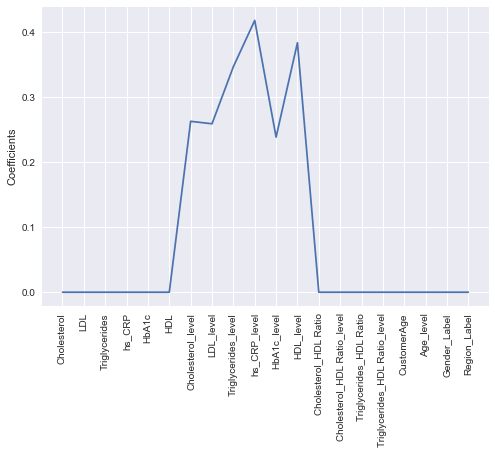

In [66]:
reg_coef = reg.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), reg_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show

In [67]:
reg.intercept_

-6.159455090777449e-17

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

Training set mean squared error

In [69]:
Y_pred = reg.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

1.7361077766792038e-15

Testing set mean squared error

In [70]:
Y_pred = reg.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

1.7438272738150677e-15

R Square Score

In [71]:
reg.fit(X_train, Y_train)

r2_score = reg.score(X_test, Y_test)
print("r2_score = ", r2_score * 100, "%")

r2_score =  100.0 %


In [72]:
cv_results = cross_val_score(reg, X, Y, cv=5)
print(cv_results)


[1. 1. 1. 1. 1.]


***Lasso Regression Model:***

In [73]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha= 0, normalize=True)
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, Y_test)


<ipython-input-73-e90bb050b6b4>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, Y_train)
C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.9999999311558176

In [74]:
Y_pred = lasso.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

0.00022264779357420692

In [75]:
Y_pred = lasso.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

0.00026425354711759433

In [76]:
cv_results = cross_val_score(lasso, X, Y, cv=5)
print(cv_results)

[0.99999991 0.99999991 0.99999993 0.99999992 0.99999993]


C:\Users\libin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\libin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users

<function matplotlib.pyplot.show(close=None, block=None)>

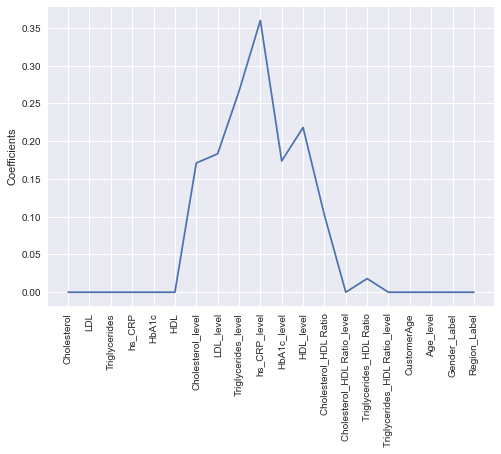

In [77]:

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), lasso_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show

***Ensemble Tree Regression Model:***

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

Tree_features = pd.DataFrame(rfr.feature_importances_, Names, columns=['Importance'])

Tree_features.Importance = Tree_features.Importance.abs()
Tree_features.head()

,Importance
Cholesterol,0.050523
LDL,0.045304
Triglycerides,0.031063
hs_CRP,0.138499
HbA1c,0.039768


<function matplotlib.pyplot.show(close=None, block=None)>

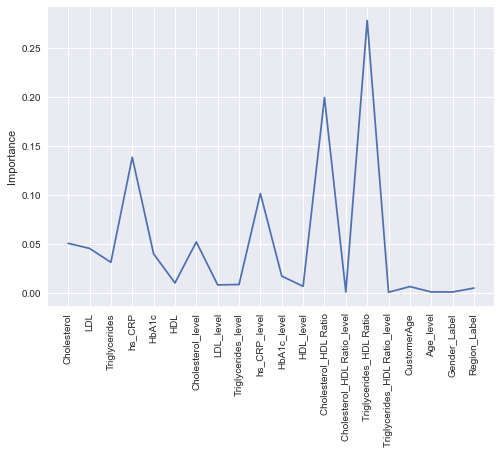

In [79]:
_ = plt.plot(range(len(Names)), Tree_features)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Importance')
plt.show

Training set mean squared error

In [80]:
Y_pred = rfr.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

0.08948440713464723

Testing set mean squared error

In [81]:
Y_pred = rfr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
sqrtmse = np.sqrt(mse)
sqrtmse

0.22868422000104538

R Square Score

In [82]:
rfr.fit(X_train, Y_train)

r2_score = rfr.score(X_test, Y_test)
print("r2_score = ", r2_score * 100, "%")

r2_score =  95.16625375495151 %


In [83]:
cv_results = cross_val_score(rfr, X, Y, cv=5)
print(cv_results)

[0.94549895 0.93813593 0.93528343 0.95377411 0.94634241]


In [84]:
df_scaled.head()

,Risk_Index,Cholesterol,LDL,Triglycerides,hs_CRP,HbA1c,HDL,Cholesterol_level,LDL_level,Triglycerides_level,...,HDL_level,Cholesterol_HDL Ratio,Cholesterol_HDL Ratio_level,Triglycerides_HDL Ratio,Triglycerides_HDL Ratio_level,CustomerAge,Age_level,Gender_Label,Region_Label,Risk_level
0,0.077668,0.287822,0.577553,0.556859,-0.586519,-0.575543,-0.964960,-0.697784,0.259794,0.335976,...,1.134782,1.093434,1.709370,0.983622,0.554643,1.470547,0.395015,2.256649,-0.970681,-0.112067
1,-1.453319,-1.135617,-0.933771,-0.904482,-0.715939,-0.891656,-0.215063,-0.697784,-1.216801,-0.766794,...,0.137855,-0.723080,-0.807989,-0.745881,-0.924682,-0.959530,-1.366219,2.256649,-1.100694,-1.526023
2,0.460415,-0.437326,-0.020679,-0.319945,-0.370818,0.267426,-0.814980,-0.697784,0.259794,-0.766794,...,1.134782,0.320590,0.450691,0.009348,0.554643,0.632590,0.395015,2.256649,1.239551,-0.112067
3,-0.687826,0.234107,0.955384,-0.612214,-0.629659,-0.680914,-1.114939,-0.697784,0.259794,-0.766794,...,1.134782,1.298973,1.709370,-0.100673,0.554643,-0.456755,0.395015,-0.443135,-0.190599,-0.112067
4,0.460415,-0.222467,-0.209595,0.303560,0.923386,-0.364801,-0.215063,-0.697784,0.259794,0.335976,...,0.137855,-0.152682,-0.807989,0.202584,0.554643,-1.629896,-1.366219,-0.443135,0.134435,-0.112067


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df_scaled = trans.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns 
x = df.drop('Risk_level', axis=1).values
y = df['Risk_level'].values
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1, 50)}
knn_cv= GridSearchCV(pipline, param_grid=parameters, cv = 5)
knn_cv.fit(x_train, y_train)
y_pred = knn_cv.predict(x_test)

print(knn_cv.best_score_ , knn_cv.best_params_)

0.8875586854460094 {'knn__n_neighbors': 7}


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.88      0.92      0.90        72
         2.0       0.88      0.92      0.90       190
         3.0       0.86      0.79      0.82        85
         4.0       1.00      0.44      0.62         9

    accuracy                           0.88       356
   macro avg       0.90      0.77      0.81       356
weighted avg       0.88      0.88      0.87       356



In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(random_state=42)
parameters = {'n_estimators': [10, 20, 40, 80, 120],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
             }
rfc_cv= GridSearchCV(rfc, param_grid=parameters, cv=5)
rfc_cv.fit(x_train, y_train)
y_pred = rfc_cv.predict(x_test)
print(rfc_cv.best_score_ , rfc_cv.best_params_)

0.9971880405238448 {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 80}


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        72
         2.0       1.00      1.00      1.00       190
         3.0       0.99      1.00      0.99        85
         4.0       1.00      0.89      0.94         9

    accuracy                           1.00       356
   macro avg       1.00      0.97      0.98       356
weighted avg       1.00      1.00      1.00       356



In [90]:
from sklearn.svm import SVC
svc = SVC()
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc_cv= GridSearchCV(svc, param_grid=parameters, cv=5)
svc_cv.fit(x_train, y_train)
y_pred = svc_cv.predict(x_test)
print(svc_cv.best_score_ , svc_cv.best_params_)

0.9655670867309117 {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        72
         2.0       0.99      0.99      0.99       190
         3.0       0.93      0.99      0.96        85
         4.0       1.00      0.56      0.71         9

    accuracy                           0.98       356
   macro avg       0.98      0.88      0.92       356
weighted avg       0.98      0.98      0.98       356

